In [14]:
#import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

# CONNECTION USING PSYCOPG2

In [15]:
import psycopg2 as ps

## Making connection
connection= conn = ps.connect(
    host="localhost",
    database="ddg",
    user="postgres",
    password="damon1864",
    port=5432)

## Creating table
cursor= connection.cursor()
cursor.execute("DROP TABLE IF EXISTS Housing_Price")
cursor.execute("create table Housing_Price(Area float, BHK float,Bathroom float,Furnishing text,Locality text, Parking float, Price float, Status text, Transaction text, Type text, Per_Sqft float)")


## Entering data from csv
cursor.execute("COPY Housing_Price FROM 'C:/Users/Public/Documents/Housing prices Delhi.csv' DELIMITER ',' CSV HEADER;")

cursor.execute("SELECT Area, BHK, Bathroom, Furnishing,Locality, Parking, Price, Status, Transaction, Type, Per_Sqft  FROM Housing_Price")

# Fetch the data from the cursor into a list of tuples
db_data = cursor.fetchall()

# Create a Pandas DataFrame from the list of tuples
housing_price= pd.DataFrame(db_data, columns=["Area", "BHK", "Bathroom","Furnishing","Locality","Parking","Price","Status","Transaction","Type","Per_Sqft"])


connection.commit()

In [16]:
#load dataset for train 
data = housing_price
data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3.0,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000.0,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2.0,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000.0,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2.0,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000.0,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2.0,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000.0,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2.0,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000.0,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4.0,5.0,Unfurnished,Chittaranjan Park,3.0,55000000.0,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3.0,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000.0,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3.0,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000.0,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2.0,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000.0,Ready_to_move,Resale,Builder_Floor,12916.0


# DATA EXPLORATION 

In [4]:
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3.0,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000.0,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2.0,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000.0,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2.0,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000.0,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2.0,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000.0,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2.0,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000.0,Ready_to_move,New_Property,Builder_Floor,6667.0


In [5]:
data.tail()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1254,4118.0,4.0,5.0,Unfurnished,Chittaranjan Park,3.0,55000000.0,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3.0,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000.0,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3.0,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000.0,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2.0,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000.0,Ready_to_move,Resale,Builder_Floor,12916.0
1258,11050.0,3.0,3.0,Unfurnished,Chittaranjan Park,1.0,18500000.0,Ready_to_move,New_Property,Builder_Floor,12916.0


In [6]:
data.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [7]:
data.shape

(1259, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   float64
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   float64
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(6), object(5)
memory usage: 108.3+ KB


In [9]:
data.isnull()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1254,False,False,False,False,False,False,False,False,False,False,False
1255,False,False,False,False,False,False,False,False,False,False,False
1256,False,False,False,False,False,False,False,False,False,False,False
1257,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.dtypes

Area           float64
BHK            float64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price          float64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

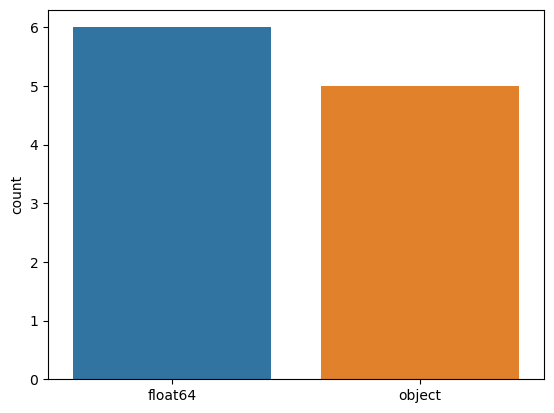

In [11]:
sns.countplot(data.dtypes.map(str))  # here we can see that the count of object is more than the float64 and int64
plt.show()

In [12]:
data.value_counts()

Area     BHK  Bathroom  Furnishing      Locality                                Parking  Price       Status         Transaction   Type           Per_Sqft
750.0    2.0  2.0       Semi-Furnished  J R Designers Floors, Rohini Sector 24  1.0      5000000.0   Ready_to_move  New_Property  Apartment      6667.0      4
1000.0   3.0  2.0       Unfurnished     Virat Residency, Dwarka Mor             1.0      4620000.0   Ready_to_move  New_Property  Apartment      4620.0      3
540.0    2.0  2.0       Semi-Furnished  Adarsh Homes, Dwarka Mor                1.0      3000000.0   Ready_to_move  New_Property  Apartment      5000.0      3
950.0    3.0  2.0       Furnished       Uttam Nagar Floors, Uttam Nagar         1.0      4370000.0   Ready_to_move  New_Property  Apartment      4600.0      3
1775.0   3.0  3.0       Semi-Furnished  The Amaryllis, Karol Bagh               1.0      25500000.0  Almost_ready   New_Property  Apartment      14366.0     3
                                                   

# DATA PREPROCESSING

**TREATING NULL VALUES**

In [13]:
## Checking for null values

data.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [14]:
## Replacing numeric null values with mean of the districuted data

data.fillna(data.mean(),inplace=True)

## Replacing object type data with none

data['Type'].fillna('None', inplace=True)
data['Furnishing'].fillna('None', inplace=True)


In [15]:
data.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [16]:
data.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.041391,6.196306,2.560115e+07,19002.775429
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6714.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,14722.000000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,15690.136542
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


**OUTLIER ANALYSIS**

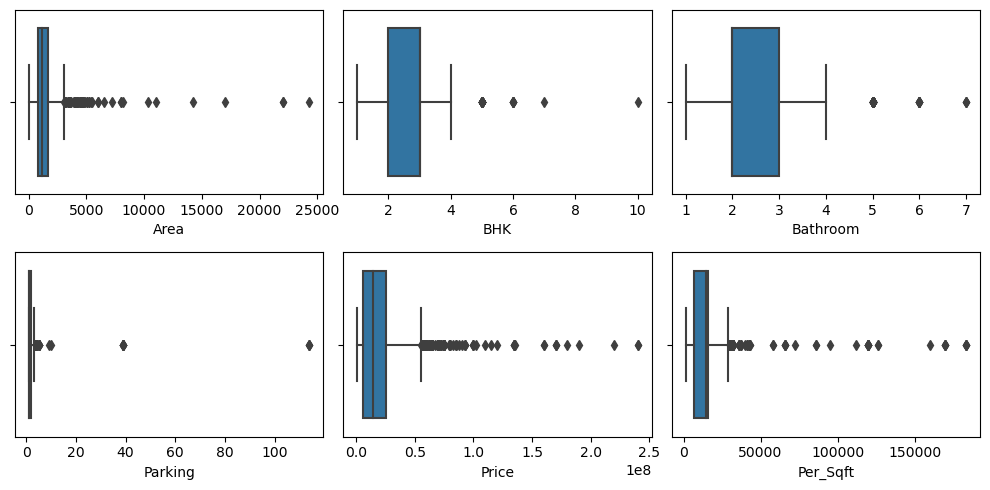

In [17]:
# Outlier Analysis

fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['Area'], ax = axs[0,0])
plt2 = sns.boxplot(data['BHK'], ax = axs[0,1])
plt3 = sns.boxplot(data['Bathroom'], ax = axs[0,2])
plt1 = sns.boxplot(data['Parking'], ax = axs[1,0])
plt2 = sns.boxplot(data['Price'], ax = axs[1,1])
plt3 = sns.boxplot(data['Per_Sqft'], ax = axs[1,2])

plt.tight_layout()

 **We can observer that Area, Price and Pre_sqft have considerable amount of outliers so we will work on them in the next step**

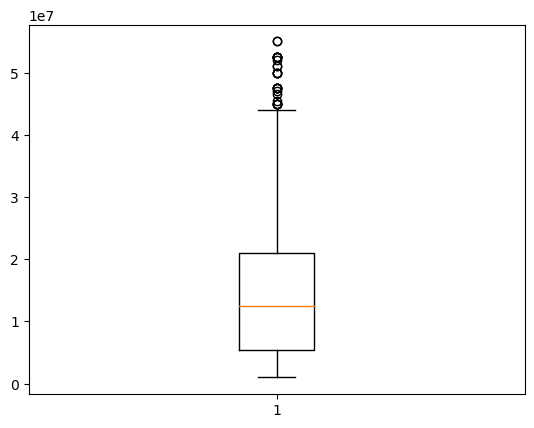

In [22]:
# outlier treatment for price

plt.boxplot(data.Price)
Q1 = data.Price.quantile(0.25)
Q3 = data.Price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Price >= Q1 - 1.5*IQR) & (data.Price <= Q3+1.5*IQR)]

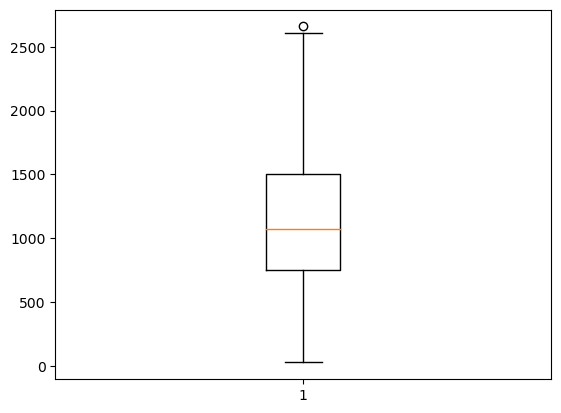

In [23]:
# outlier treatment for area

plt.boxplot(data.Area)
Q1 = data.Area.quantile(0.25)
Q3 = data.Area.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Area >= Q1 - 1.5*IQR) & (data.Area <= Q3 + 1.5*IQR)]


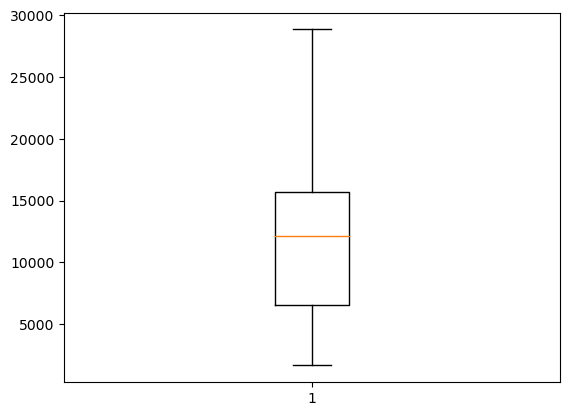

In [24]:
# outlier treatment for Per_sqft

plt.boxplot(data.Per_Sqft)
Q1 = data.Per_Sqft.quantile(0.25)
Q3 = data.Per_Sqft.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Per_Sqft >= Q1 - 1.5*IQR) & (data.Per_Sqft <= Q3 + 1.5*IQR)]

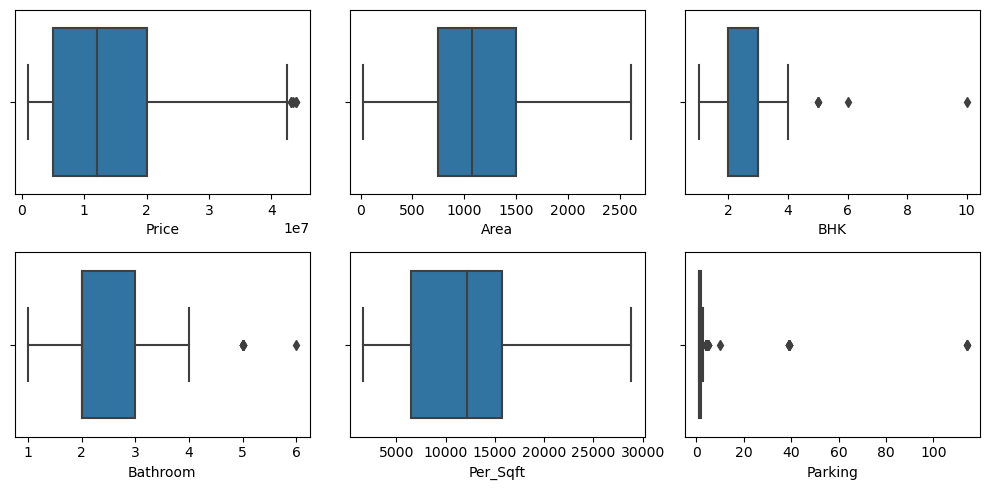

In [25]:
# Outlier Analysis after treating the ouliers

fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['Price'], ax = axs[0,0])
plt2 = sns.boxplot(data['Area'], ax = axs[0,1])
plt3 = sns.boxplot(data['BHK'], ax = axs[0,2])
plt1 = sns.boxplot(data['Bathroom'], ax = axs[1,0])
plt2 = sns.boxplot(data['Per_Sqft'], ax = axs[1,1])
plt3 = sns.boxplot(data['Parking'], ax = axs[1,2])

plt.tight_layout()

**DISTRIBUTION OF THE DATA**

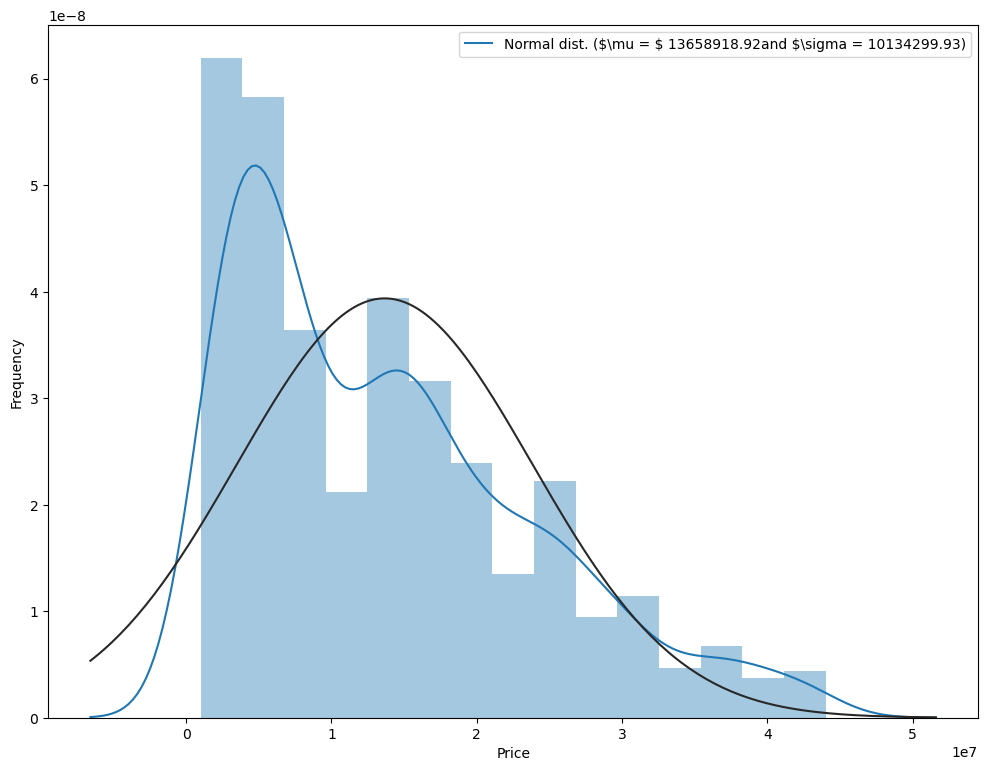

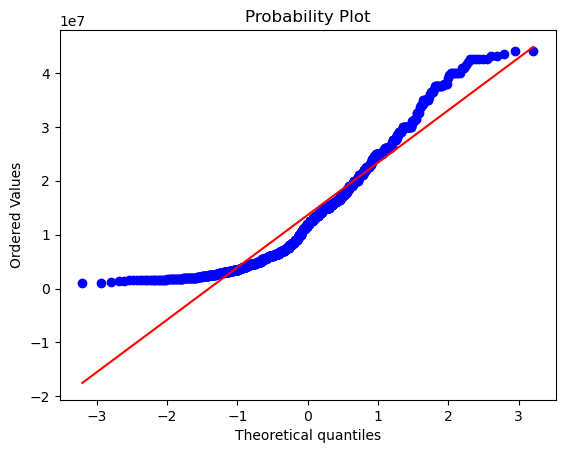

In [26]:
## Checking the distribution of the data

plt.subplots(figsize=(12,9))
sns.distplot(data['Price'], fit = stats.norm)

# get the fitted parameters used by the function
(mu,sigma)= stats.norm.fit(data['Price'])

#plot with distribution 
plt.legend(['Normal dist. ($\mu = $ {:.2f}and $\sigma = {:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')

#PROBABILITY PLOT
fig = plt.figure()
stats.probplot(data['Price'],plot=plt)
plt.show()

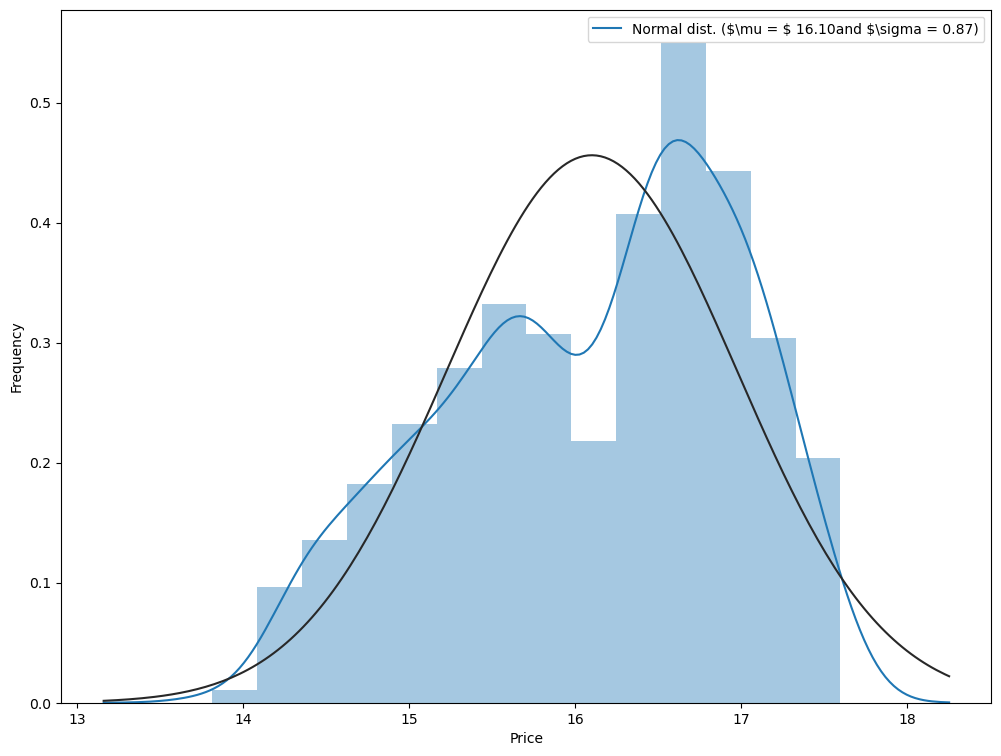

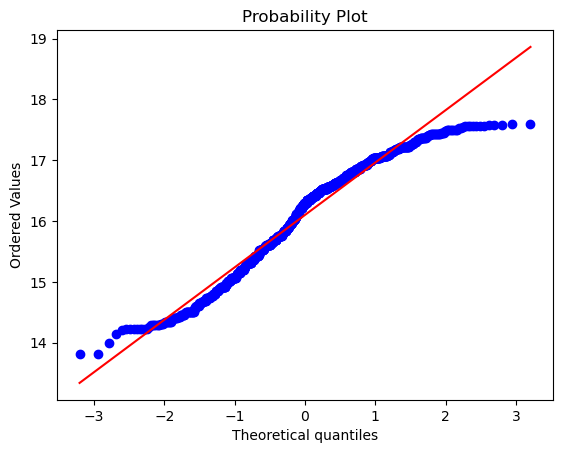

In [27]:

## We use the log which is a part of numpy library

data['Price'] = np.log1p(data['Price'])

#Check again for normal distribution 
plt.subplots(figsize =(12,9))
sns.distplot(data['Price'], fit = stats.norm)

#get the fitted parameters used by the function
(mu,sigma)= stats.norm.fit(data['Price'])

#plot with the distribution
plt.legend(['Normal dist. ($\mu = $ {:.2f}and $\sigma = {:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')

#Probability plot
fig = plt.figure()
stats.probplot(data['Price'],plot=plt)
plt.show()

In [28]:
## We will drop the locality column as we do not require it
data=data.drop(['Locality'], axis=1)
data.head()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3.0,2.0,Semi-Furnished,1.0,15.687313,Ready_to_move,New_Property,Builder_Floor,15690.136542
1,750.0,2.0,2.0,Semi-Furnished,1.0,15.424949,Ready_to_move,New_Property,Apartment,6667.000000
2,950.0,2.0,2.0,Furnished,1.0,16.556351,Ready_to_move,Resale,Apartment,6667.000000
3,600.0,2.0,2.0,Semi-Furnished,1.0,15.250595,Ready_to_move,Resale,Builder_Floor,6667.000000
4,650.0,2.0,2.0,Semi-Furnished,1.0,15.640060,Ready_to_move,New_Property,Builder_Floor,6667.000000


In [29]:
## Converting into categorical form for application of model

data_cat = data.select_dtypes(include = 'object').columns   #seperating categorical variables


##converting to categoriccal form


for c in data_cat:
    lbl = LabelEncoder()
    lbl.fit(list(data[c].values))
    data[c]=lbl.transform(list(data[c].values))

In [30]:
data.head()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3.0,2.0,2,1.0,15.687313,1,0,1,15690.136542
1,750.0,2.0,2.0,2,1.0,15.424949,1,0,0,6667.000000
2,950.0,2.0,2.0,0,1.0,16.556351,1,1,0,6667.000000
3,600.0,2.0,2.0,2,1.0,15.250595,1,1,1,6667.000000
4,650.0,2.0,2.0,2,1.0,15.640060,1,0,1,6667.000000


# DATA ANALYSIS

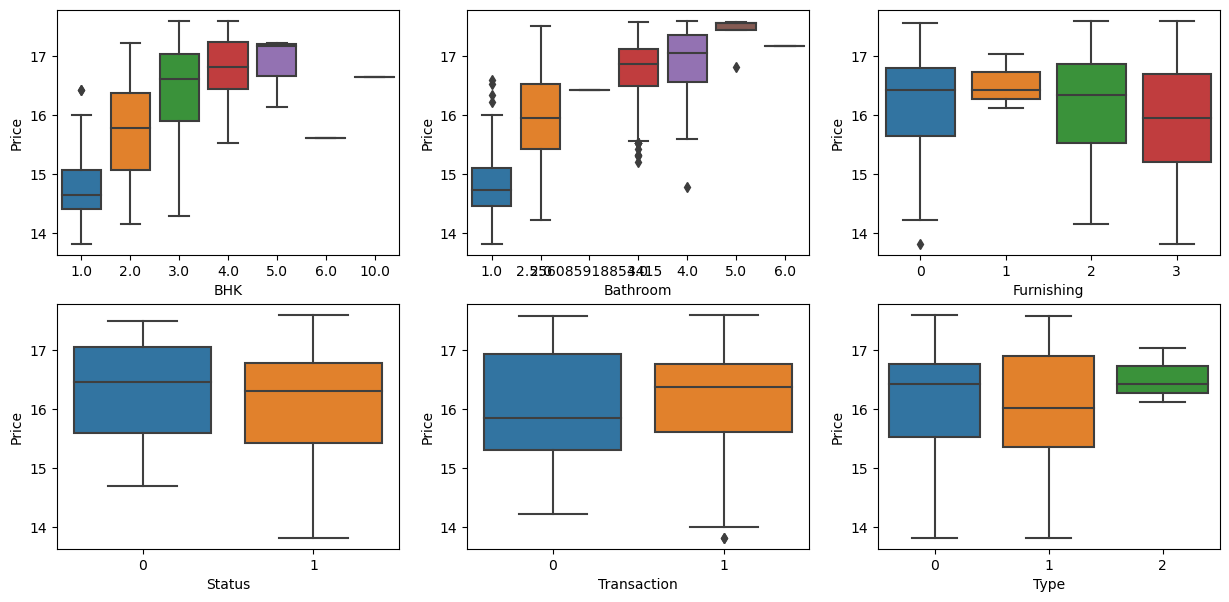

In [31]:
## Comparing different attributes with the Price

plt.figure(figsize=(15,7))

plt.subplot(2,3,1)
sns.boxplot(x = data.iloc[:,1], y = data.iloc[:,5])
plt.subplot(2,3,2)
sns.boxplot(x =data.iloc[:,2] , y = data.iloc[:,5])
plt.subplot(2,3,3)
sns.boxplot(x = data.iloc[:,3], y = data.iloc[:,5])
plt.subplot(2,3,4)
sns.boxplot(x = data.iloc[:,6], y = data.iloc[:,5])
plt.subplot(2,3,5)
sns.boxplot(x =data.iloc[:,7] , y = data.iloc[:,5])
plt.subplot(2,3,6)
sns.boxplot(x = data.iloc[:,8], y = data.iloc[:,5])


plt.show()

In [32]:
#Correlation between data attributes
#Seperate data which has only numeric values

data_corr= data.select_dtypes(include=[np.number])
data_corr

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3.0,2.0,2,1.0,15.687313,1,0,1,15690.136542
1,750.0,2.0,2.0,2,1.0,15.424949,1,0,0,6667.000000
2,950.0,2.0,2.0,0,1.0,16.556351,1,1,0,6667.000000
3,600.0,2.0,2.0,2,1.0,15.250595,1,1,1,6667.000000
4,650.0,2.0,2.0,2,1.0,15.640060,1,0,1,6667.000000
...,...,...,...,...,...,...,...,...,...,...
1252,1800.0,3.0,3.0,2,1.0,17.073607,1,1,1,12916.000000
1253,1200.0,3.0,3.0,2,1.0,16.618871,1,1,1,12916.000000
1255,1050.0,3.0,2.0,2,3.0,16.341239,1,1,1,12916.000000
1256,875.0,3.0,3.0,2,3.0,16.677711,1,0,1,12916.000000


<AxesSubplot:>

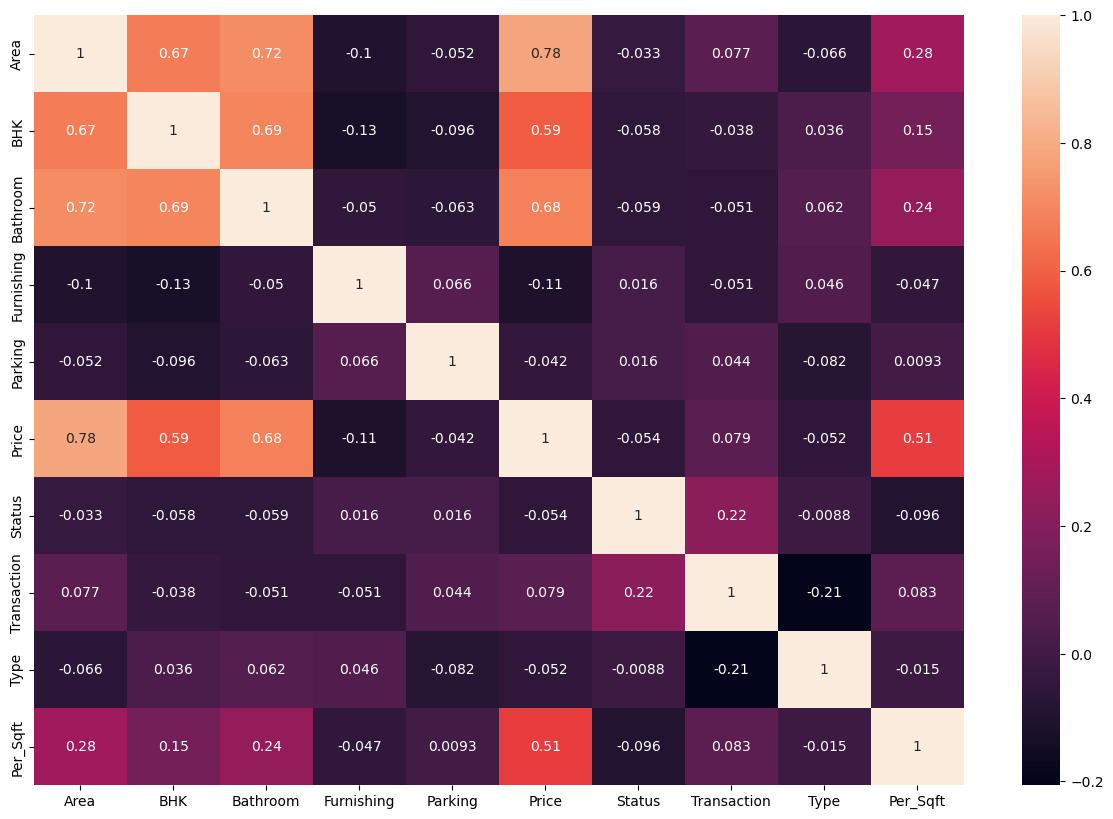

In [33]:
#correlation plot

corr =data_corr.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot = True)

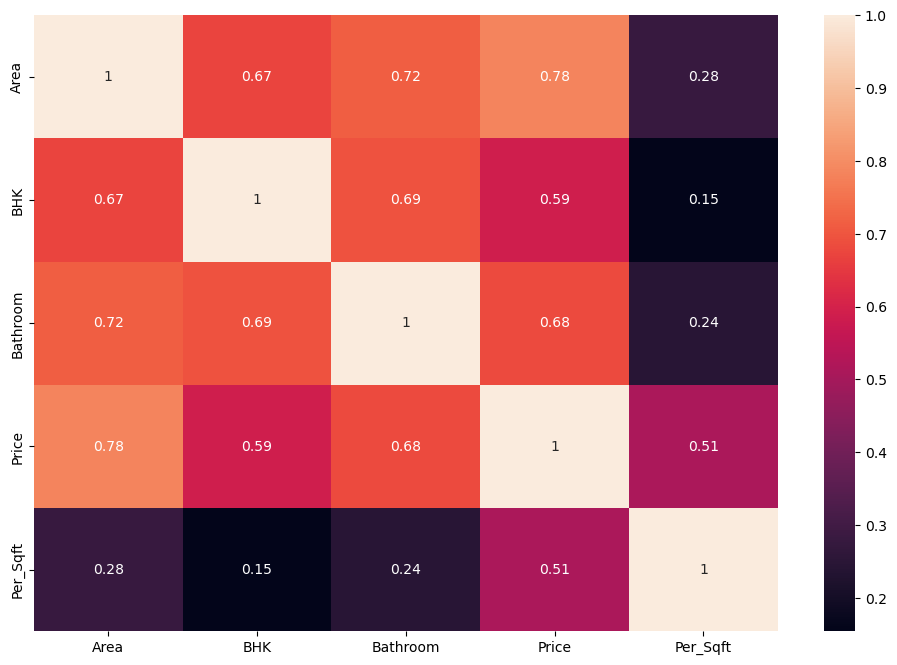

In [34]:
##Relation among top features

top_feature = corr.index[abs(corr['Price']>0.5)]
plt.subplots(figsize=[12,8])
top_corr = data[top_feature].corr()
sns.heatmap(top_corr, annot = True)
plt.show()

**We can see bathroom is highly related with price**

In [35]:
print('Find the most important features relative to the traget')
corr = data.corr()
corr.sort_values(['Price'], ascending = False , inplace = True)
corr.Price

Find the most important features relative to the traget


Price          1.000000
Area           0.784657
Bathroom       0.680900
BHK            0.588831
Per_Sqft       0.514031
Transaction    0.078698
Parking       -0.042000
Type          -0.051957
Status        -0.053684
Furnishing    -0.111760
Name: Price, dtype: float64

<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

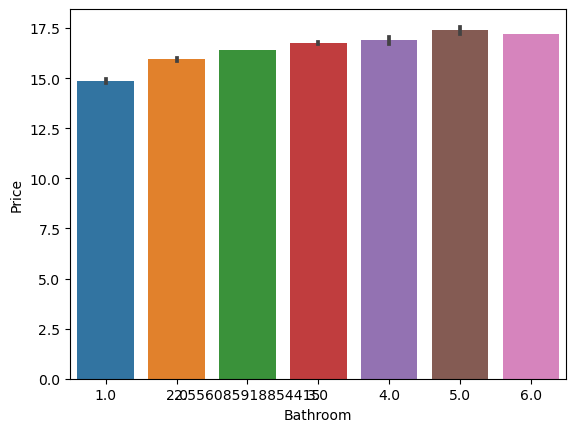

In [36]:
## Rlation between bathroom and price features

sns.barplot(data.Bathroom, data.Price)

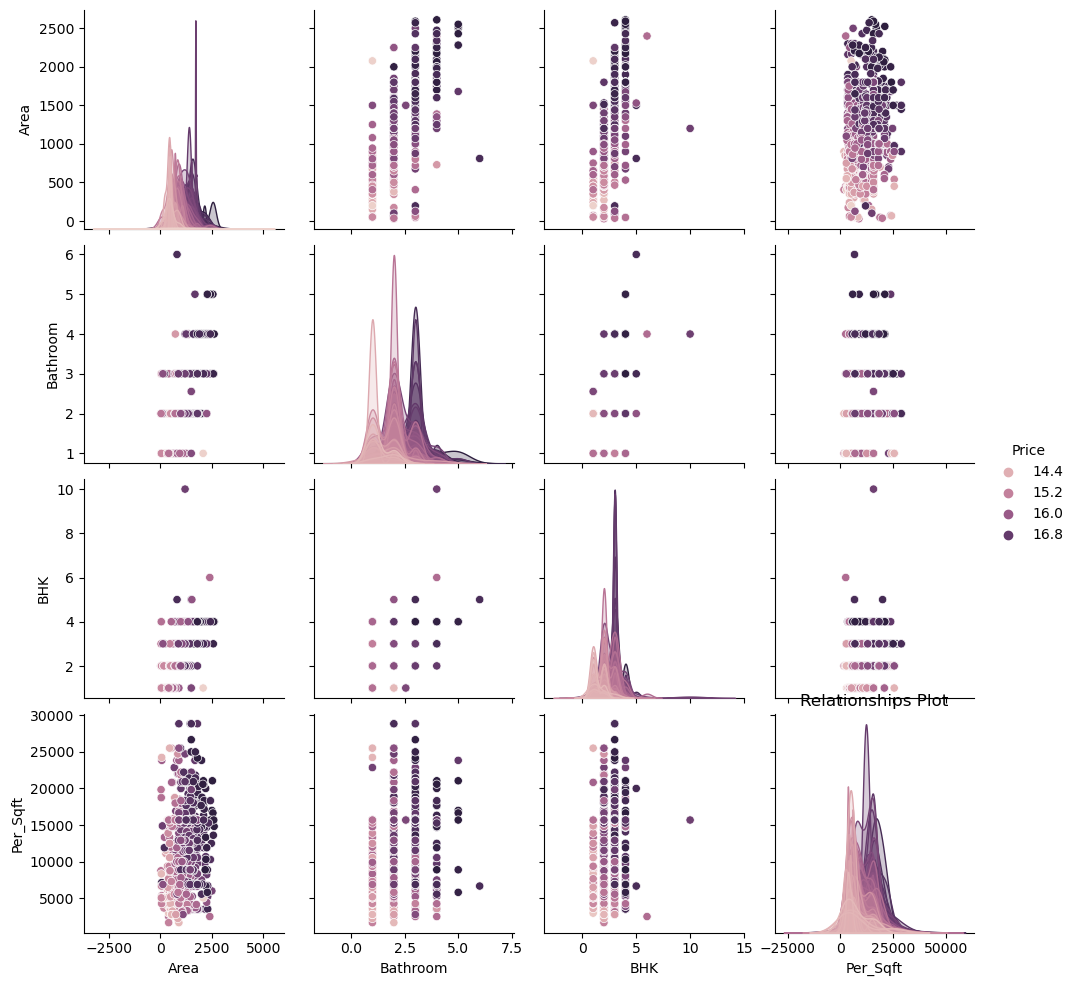

In [37]:
import seaborn as sns

# create a pair plot for the relationship between dependent and independent variables
sns.pairplot(data, vars=["Area","Bathroom", "BHK","Per_Sqft"], kind="scatter", hue="Price")
plt.title("Relationships Plot")

plt.show()

# MACHINE LEARNING MODEL

In [38]:
## Assigning varibles to the data set for the model

x=data[['Area','BHK','Bathroom','Per_Sqft']]

y=np.array(data['Price']).reshape(-1,1)

In [39]:
x.shape,y.shape

((1036, 4), (1036, 1))

In [40]:
#splitting the data in train and test

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((725, 4), (311, 4), (725, 1), (311, 1))

## LINEAR REGRESSION

In [42]:
lr_reg=LinearRegression()
lr_reg.fit(x_train,y_train)
lr_y_pred=lr_reg.predict(x_test)

In [43]:
print(lr_reg.intercept_,lr_reg.coef_)

[13.92771881] [[8.80388974e-04 5.81813327e-02 2.23043380e-01 4.57437067e-05]]


In [44]:
## Evaluating the performance


mse=mean_squared_error(y_test,lr_y_pred)
rmse=sqrt(mse)
r_squared = r2_score(y_test, lr_y_pred)

print('Mean_Squared_Error:',mse)
print('Root_Mean_Sqaured_Erro:',rmse)
print('r_sqaure_value:',r_squared)


Mean_Squared_Error: 0.18687048489722932
Root_Mean_Sqaured_Erro: 0.4322851893105168
r_sqaure_value: 0.765324675301181


In [45]:
print(f"Train Accuracy : {lr_reg.score(x_train, y_train)*100}")
print(f"Test Accuracy : {lr_reg.score(x_test, y_test)*100}")

Train Accuracy : 72.0180977718929
Test Accuracy : 76.5324675301181


In [46]:
from IPython.core.display import display, HTML
lr_accuracy=round((lr_reg.score(x_test,y_test)*100),2)
HTML (f'Linear Regression Model Accuracy : <b>{lr_accuracy}%</b>')

In [47]:
data.head()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3.0,2.0,2,1.0,15.687313,1,0,1,15690.136542
1,750.0,2.0,2.0,2,1.0,15.424949,1,0,0,6667.000000
2,950.0,2.0,2.0,0,1.0,16.556351,1,1,0,6667.000000
3,600.0,2.0,2.0,2,1.0,15.250595,1,1,1,6667.000000
4,650.0,2.0,2.0,2,1.0,15.640060,1,0,1,6667.000000


In [49]:
## Predicting Price for a old Data to check for accuracy

old_data = [[800,3,2,15690.136542]] 
old_data = np.array(old_data)
predicted_price = lr_reg.predict(old_data)
print(f"The predicted price for the property is: {predicted_price} ")

The predicted price for the property is: [[15.97038575]] 


In [50]:
## Prediction Price for New Data

new_data = [[900,3,3,11700]] 
new_data = np.array(new_data)
predicted_price = lr_reg.predict(new_data)
print(f"The predicted price for the new property is: {predicted_price}")

The predicted price for the new property is: [[16.09894439]]


## DECISION TREE

In [51]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)
dt_y_pred = dt_reg.predict(x_test)

In [52]:
mse=mean_squared_error(y_test,dt_y_pred)
rmse=sqrt(mse)
r_squared = r2_score(y_test,dt_y_pred)

print('Mean_Squared_Error:',mse)
print('Root_Mean_Sqaured_Erro:',rmse)
print('r_sqaure_value:',r_squared)

Mean_Squared_Error: 0.20314462345005868
Root_Mean_Sqaured_Erro: 0.4507156791704263
r_sqaure_value: 0.7448873186411435


In [53]:
print(f"Train Accuracy : {dt_reg.score(x_train, y_train)*100}")
print(f"Test Accuracy : {dt_reg.score(x_test, y_test)*100}")

Train Accuracy : 98.07567506467674
Test Accuracy : 74.48873186411436


In [54]:
from IPython.core.display import display, HTML
dt_accuracy=round((dt_reg.score(x_test,y_test)*100),2)
HTML (f'Decision Tree Model Accuracy : <b>{dt_accuracy}%</b>')

## RANDOM FOREST

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
rf_y_pred = rf_reg.predict(x_test)

In [56]:
mse=mean_squared_error(y_test,rf_y_pred)
rmse=sqrt(mse)
r_squared = r2_score(y_test,rf_y_pred)

print('Mean_Squared_Error:',mse)
print('Root_Mean_Sqaured_Erro:',rmse)
print('r_sqaure_value:',r_squared)

Mean_Squared_Error: 0.1515998031970481
Root_Mean_Sqaured_Erro: 0.38935819395133847
r_sqaure_value: 0.8096182334031509


In [57]:
print(f"Train Accuracy : {rf_reg.score(x_train, y_train)*100}")
print(f"Test Accuracy : {rf_reg.score(x_test, y_test)*100}")

Train Accuracy : 95.58753087675817
Test Accuracy : 80.96182334031509


In [58]:
from IPython.core.display import display, HTML
rf_accuracy=round((rf_reg.score(x_test,y_test)*100),2)
HTML (f'Random Forest Model Accuracy : <b>{rf_accuracy}%</b>')

# DATA VISUALISATION

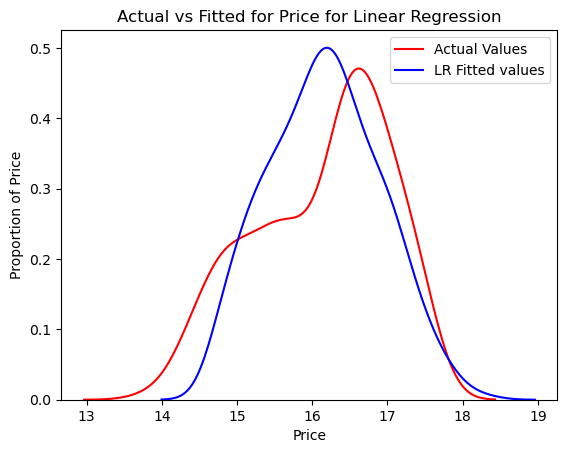

In [59]:
# distribution plot to compare Actual vs Predicted values for Price- Linear Regression
ax1= sns.distplot(y_test,hist=False,color='r',label='Actual Values')
sns.distplot(lr_y_pred,hist=False,color='b',label='LR Fitted values',ax=ax1)
plt.title('Actual vs Fitted Price for Linear Regression')
plt.xlabel('Price')
plt.ylabel('Proportion of Price')
plt.legend(loc='best')
plt.show()

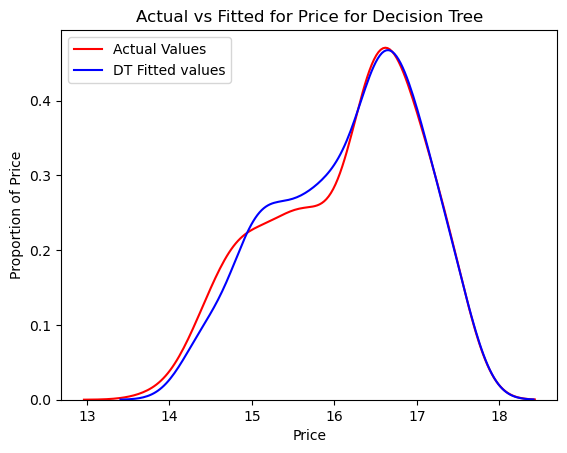

In [60]:
# distribution plot to compare Actual vs Predicted values for Price- Decision Tree
ax1= sns.distplot(y_test,hist=False,color='r',label='Actual Values')
sns.distplot(dt_y_pred,hist=False,color='b',label='DT Fitted values',ax=ax1)
plt.title('Actual vs Fitted Price for Decision Tree')
plt.xlabel('Price')
plt.ylabel('Proportion of Price')
plt.legend(loc='best')
plt.show()

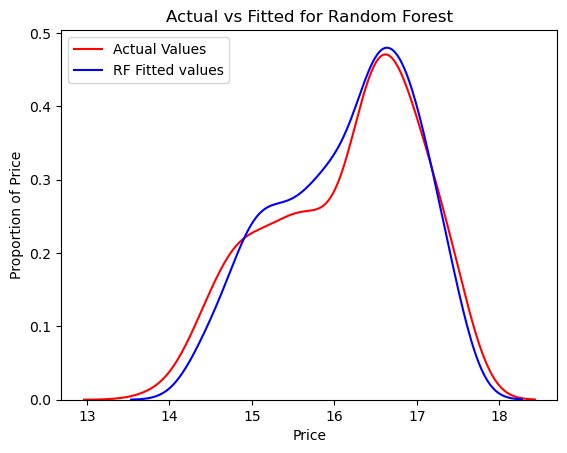

In [61]:
# distribution plot to compare Actual vs Predicted values for Price- Random Forest
ax1= sns.distplot(y_test,hist=False,color='r',label='Actual Values')
sns.distplot(rf_y_pred,hist=False,color='b',label='RF Fitted values',ax=ax1)
plt.title('Actual vs Fitted Price for Random Forest')
plt.xlabel('Price')
plt.ylabel('Proportion of Price')
plt.legend(loc='best')
plt.show()

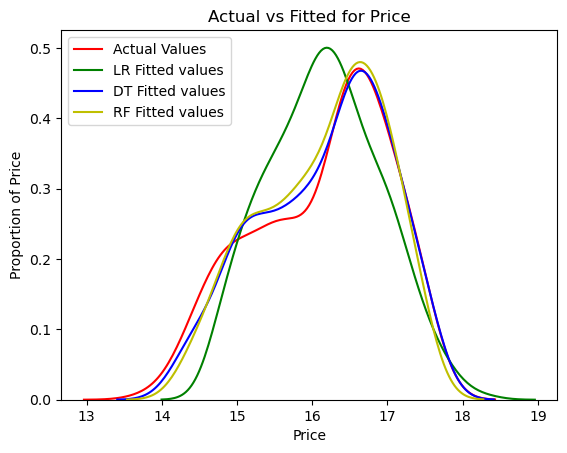

In [62]:
# distribution plot to compare Actual vs Predicted values for Price
ax1= sns.distplot(y_test,hist=False,color='r',label='Actual Values')
sns.distplot(lr_y_pred,hist=False,color='g',label='LR Fitted values',ax=ax1)
sns.distplot(dt_y_pred,hist=False,color='b',label='DT Fitted values',ax=ax1)
sns.distplot(rf_y_pred,hist=False,color='y',label='RF Fitted values',ax=ax1)
plt.title('Actual vs Fitted Price for All 3 AlgorithmsD')
plt.xlabel('Price')
plt.ylabel('Proportion of Price')
plt.legend(loc='best')
plt.show()

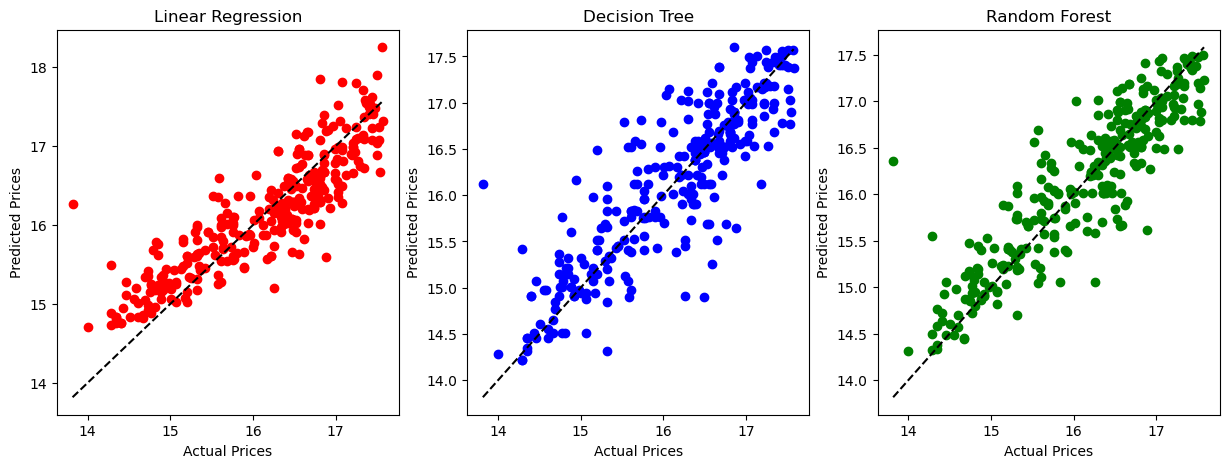

In [63]:
## Comaprison of Actual and Predicted Values for all # Plots

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot scatter plots and line for perfect correlation on each subplot
for i, (y_pred, title, colors) in enumerate(zip([lr_y_pred, dt_y_pred, rf_y_pred], ['Linear Regression', 'Decision Tree', 'Random Forest'],['red','blue','green'])):
    axes[i].scatter(y_test, y_pred, color=colors)
    axes[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
    axes[i].set_xlabel("Actual Prices")
    axes[i].set_ylabel("Predicted Prices")
    axes[i].set_title(title)

# Display the subplots
plt.show()


# RESULT

In [72]:
## Accuracy of all Models

print("Linear Regression Accuracy : ", lr_accuracy)
print("Decision Tree Accuracy :", dt_accuracy)
print("Random Forest Accuracy :",rf_accuracy)

Linear Regression Accuracy :  76.53
Decision Tree Accuracy : 74.49
Random Forest Accuracy : 80.96


In [64]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
lr_scores = cross_val_score(lr_reg, x, y, cv=5)
rf_scores = cross_val_score(rf_reg, x, y, cv=5)
dt_scores = cross_val_score(dt_reg, x, y, cv=5)

# Print the mean and standard deviation of the scores
print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (lr_scores.mean(), lr_scores.std() * 2))
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (rf_scores.mean(), rf_scores.std() * 2))
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (dt_scores.mean(), dt_scores.std() * 2))

Logistic Regression Accuracy: 0.64 (+/- 0.19)
Random Forest Accuracy: 0.68 (+/- 0.15)
Decision Tree Accuracy: 0.54 (+/- 0.21)


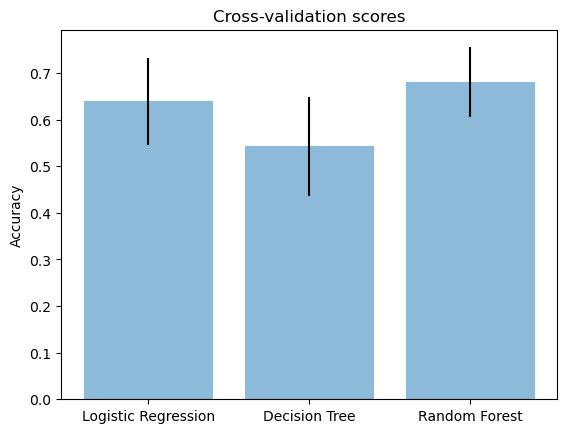

In [73]:
# Create a bar plot for Cross validation

labels = ['Logistic Regression', 'Decision Tree', 'Random Forest']
means = [lr_scores.mean(), dt_scores.mean(), rf_scores.mean()]
stds = [lr_scores.std(), dt_scores.std(), rf_scores.std()]
x_pos = np.arange(len(labels))
plt.bar(x_pos, means, yerr=stds, align='center', alpha=0.5)
plt.xticks(x_pos, labels)
plt.ylabel('Accuracy')
plt.title('Cross-validation scores')

plt.show()


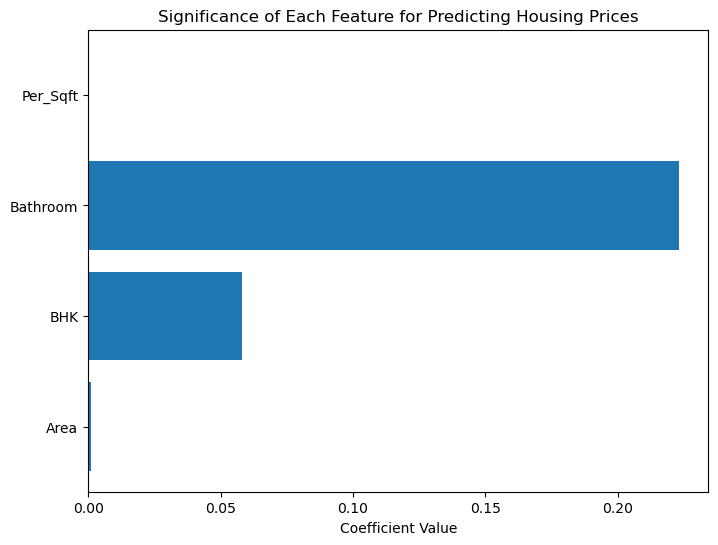

In [68]:
## Signifircance of each attribute for Predicting prices

coef = np.array(lr_reg.coef_)
features = np.array(x_train.columns)
coef = np.squeeze(coef)

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(features, coef)
plt.xlabel('Coefficient Value')
plt.title('Significance of Each Feature for Predicting Housing Prices')
plt.show()

# GEOPANDAS

In [2]:
import geopandas as gpd

In [57]:
file="C:\\Users\\hp\\Downloads\\DSSA\\Machine Learning\\Mini Project\\delhi_location\\delhi_location.shp"

##Read the file
gdf=gpd.read_file(file)
gdf

,NAME,PLACE,ADDR:CITY,ADDR:HOUSE,ADDR:FLATS,ADDR:POSTC,geometry
0,Farrukhnagan,village,None,None,None,None,POINT (76.82409 28.44734)
1,Sultanpur,village,None,None,None,None,POINT (76.89174 28.46791)
2,Chandu,village,None,None,None,None,POINT (76.92270 28.47160)
3,Bahadurgarh,village,None,None,None,None,POINT (76.93294 28.69042)
4,Dhulkot,village,None,None,None,None,POINT (76.96117 28.47578)
...,...,...,...,...,...,...,...
1106,Mamura,hamlet,None,None,None,None,POINT (77.37549 28.60362)
1107,None,None,Ghaziabad,None,None,201014,POINT (77.37775 28.64240)
1108,None,None,Noida,B-63,None,201301,POINT (77.38766 28.61303)
1109,Noida Special Economic Zone,suburb,None,None,None,None,POINT (77.39737 28.53960)


In [54]:
geom =gdf.geometry

<AxesSubplot:>

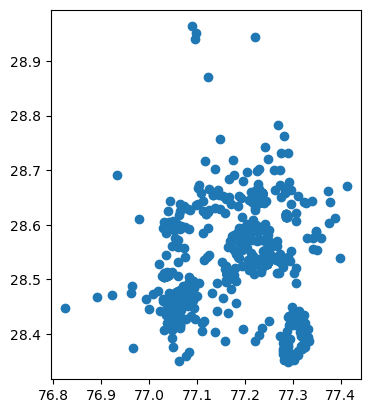

In [70]:
geo_data = data.iloc[0:1111,]
geo_data['geom'] = geom
shape = gpd.GeoDataFrame(geo_data, geometry=geo_data.geom)
shape.plot()

Text(0.5, 1.0, 'Lowest Price')

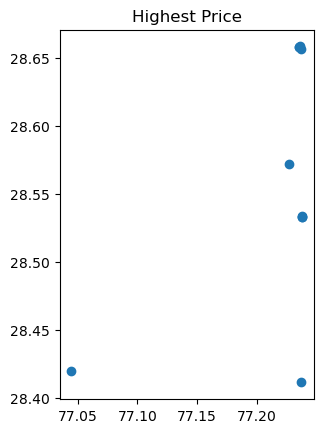

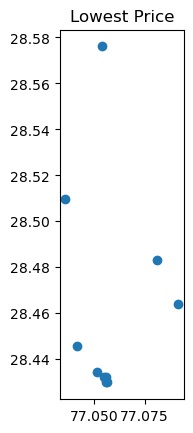

In [101]:
highest = shape.Price.sort_values()[:10]
lowest = shape.Price.sort_values()[-10:]
index = [i for i in highest.index]
index_low = [i for i in lowest.index]
shape.iloc[index,:].plot()
plt.title("Highest Price")
shape.iloc[index_low,:].plot()
plt.title("Lowest Price")

Text(0.5, 1.0, 'Lowest Area')

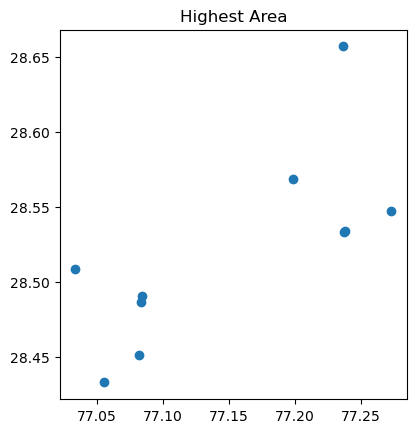

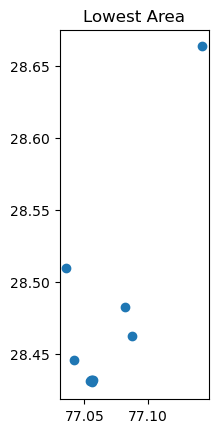

In [102]:
highest_area = shape.Area.sort_values()[:10]
lowest_area = shape.Area.sort_values()[-10:]
index_area = [i for i in highest_area.index]
index_low = [i for i in lowest_area.index]
shape.iloc[index_area,:].plot()
plt.title("Highest Area")
shape.iloc[index_low,:].plot()
plt.title("Lowest Area")